# Sentence Classification with BERT





In this assignment, we're going to investigate Bert performance on a sentence classification task

# 1. Setup

## 1.1. Using Colab GPU for Training


Specify GPU for training.

In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


## 1.2. Installing the Hugging Face Library




---
To use BERT in PyTorch, install [transformers](https://github.com/huggingface/transformers) package from Hugging Face. It offers a PyTorch interface for BERT and other pretrained language models like GPT and GPT-2.

Hugging Face provides is widely used for BERT-related tasks. In our assignment, we'll focus on using BertForSequenceClassification.


---


In [2]:
!pip install transformers

# 2. Loading Dataset


We can use the helper function given in the previous part of asignment 3 to extract the sentences and labels of our training set.

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# cd /content/drive/MyDrive/BERT\ text\ classification\ with\ pytorch/
import os
os.chdir("/content/drive/MyDrive/ColabNotebooks/")
!pwd
!ls

/content/drive/MyDrive/ColabNotebooks
 20news_subsampled			   chapter3.ipynb
'Assignment1_proj (1).ipynb'		   Chapter4.ipynb
 Assignment1_proj_2024.ipynb		  'Copy of 05.09-Principal-Component-Analysis.ipynb'
 Assignment1_proj.ipynb			  'Copy of assignment2_proj_solution_oliver.ipynb'
 Assignment1_proj_sol_2024.ipynb	   Copy_of_Sentence_Classification_with_BERT_4.ipynb
 Assignment1_proj_sol.ipynb		  'Copy of Tensor2Tensor Intro'
'Assignment 1-Solution.ipynb'		  'Copy of  Tensor2Tensor Intro by kiarash'
'Assignment 1-Solution-keras.ipynb'	  'create_database carla271_1.ipynb'
 assignment2_proj.ipynb			   Dataset
 assignment2_proj_solution.ipynb	  'English Literature.txt'
 assignment2_proj_solution_kiarash.ipynb   PCADemo.ipynb
 assignment2_proj_solution_oliver.ipynb    Principal-Component-Analysis.ipynb
 assignment3_proj.ipynb			   timeslice2.ipynb
 assignment3_proj_solution.ipynb	   train.csv
'Assignment Two-released.ipynb'		   Untitled0.ipynb
'Assignment Two Solution.ipynb'		   validati

In [30]:
"""This code is used to read all news and their labels"""
import os
import glob

def to_categories(name, cat=["politics","rec","comp","religion"]):
    for i in range(len(cat)):
        if str.find(name,cat[i])>-1:
            return(i)
    print("Unexpected folder: " + name) # print the folder name which does not include expected categories
    return("wth")

def data_loader(images_dir):
    categories = os.listdir(data_path)
    news = [] # news content
    groups = [] # category which it belong to

    for cat in categories:
        print("Category:"+cat)
        for the_new_path in glob.glob(data_path + '/' + cat + '/*'):
            news.append(open(the_new_path,encoding = "ISO-8859-1", mode ='r').read())
            groups.append(cat)

    return news, list(map(to_categories, groups))



data_path = "20news_subsampled"
news, groups = data_loader(data_path)

Category:rec.autos
Category:talk.politics.misc
Category:rec.motorcycles
Category:comp.windows.x
Category:comp.graphics
Category:comp.sys.ibm.pc.hardware
Category:talk.politics.guns
Category:comp.sys.mac.hardware
Category:rec.sport.baseball
Category:comp.os.ms-windows.misc
Category:rec.sport.hockey
Category:soc.religion.christian
Category:talk.politics.mideast
Category:talk.religion.misc


In [31]:
import numpy as np
sentences=np.array(news)
labels=np.array(groups)

# 3. Tokenization & Input Formatting

In this section, we'll transform our dataset into the format that BERT can be trained on. You should complete step 3.2.

## 3.1. BERT Tokenizer

In order to use BERT for text processing, we need to tokenize the text by splitting it into tokens and mapping these tokens to their corresponding indices in the tokenizer vocabulary.

To achieve this, we will utilize the tokenizer provided with BERT. The code snippet in the following cell will download the tokenizer for us. In this case, we will be using the "uncased" version of the tokenizer.

In [32]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

## 3.2. Required Formatting

We are required to:
1. Split the sentence into tokens. Map the tokens to their IDs.
2. Add special tokens (`[SEP]`, `[CLS]`) to the start and end of each sentence.
2. Pad & truncate all sentences to a single constant length `MAX_LEN`. Keep in mind that The maximum sentence length is 512 tokens.
3. Explicitly differentiate real tokens from padding tokens with the "attention mask".

Write a code to do these steps, the output should be:
  1. input_ids: a ndarray of size num_sentences*MAX_LEN which stores the encoded sentences
  2. attention_masks: a list of size num_sentences where every element of it is a list of size MAX_LEN which stores the attention mask of the corresponding sentence

  After you have done the preprocessing, you can and should use the training code that starts in Section 3.3. to train your classification model. Compare the output using the pretrained Bert embeddings with your result from before where you used an RNN to train embeddings yourself.


In [37]:
MAX_LEN=64
num_sentences=len(news)
# Write your code here



# Place holder. We are assuming that your formatting code outputs numpy objects as shown
attention_masks = [np.zeros(MAX_LEN) for _ in range(num_sentences)]
input_ids = np.zeros((num_sentences, MAX_LEN),dtype=np.int64)
len(input_ids)


0

## 3.3. Training & Validation Split


Divide up our training set to use 90% for training and 10% for validation.

In [35]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## 3.4. Converting to PyTorch Data Types

Our model expects PyTorch tensors rather than numpy.ndarrays, so convert all of our dataset variables.

In [41]:
# Convert all inputs and labels into torch tensors, the required datatype
# for our model.
# You can also use the library torch.from_numpy

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

NameError: name 'train_inputs' is not defined

We'll also create an iterator for our dataset using the torch DataLoader class.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


# 4. Train Our Classification Model

Now that our input data is properly formatted, it's time to fine tune the BERT model.

## 4.1. BertForSequenceClassification



We'll be using [BertForSequenceClassification](https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#bertforsequenceclassification). This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.


Now, we will proceed to load BERT. There are several pre-trained BERT models to choose from. By selecting "bert-base-uncased," we opt for the smaller version of BERT that operates with only lowercase text


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 4, # The number of output labels
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

## 4.2. Optimizer & Learning Rate Scheduler

Now that we have our model loaded we need to grab the training hyperparameters from within the stored model.

For the purposes of fine-tuning, the authors recommend choosing from the following values:
- Batch size: 16, 32  (We chose 32 when creating our DataLoaders).
- Learning rate (Adam): 5e-5, 3e-5, 2e-5  (We'll use 2e-5).
- Number of epochs: 2, 3, 4  (We'll use 4).

The epsilon parameter `eps = 1e-8` is "a very small number to prevent any division by zero in the implementation" (from [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)).


In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

## 4.3. Training Loop

Below is our training loop. For each pass in our loop we have a trianing phase and a validation phase. At each pass we need to:

Training loop:
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Clear out the gradients calculated in the previous pass.
    - In pytorch the gradients accumulate by default (useful for things like RNNs) unless you explicitly clear them out.
- Forward pass (feed input data through the network)
- Backward pass (backpropagation)
- Tell the network to update parameters with optimizer.step()
- Track variables for monitoring progress

Evalution loop:
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Forward pass (feed input data through the network)
- Compute loss on our validation data and track variables for monitoring progress



Define a helper function for calculating accuracy.

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

Helper function for formatting elapsed times.


In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


We're ready to kick off the training!

In [ ]:
import random

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.

        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    369.    Elapsed: 0:00:17.
  Batch    80  of    369.    Elapsed: 0:00:33.
  Batch   120  of    369.    Elapsed: 0:00:48.
  Batch   160  of    369.    Elapsed: 0:01:02.
  Batch   200  of    369.    Elapsed: 0:01:17.
  Batch   240  of    369.    Elapsed: 0:01:32.
  Batch   280  of    369.    Elapsed: 0:01:47.
  Batch   320  of    369.    Elapsed: 0:02:02.
  Batch   360  of    369.    Elapsed: 0:02:17.

  Average training loss: 1.32
  Training epcoh took: 0:02:20

Running Validation...
  Accuracy: 0.37
  Validation took: 0:00:05

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    369.    Elapsed: 0:00:15.
  Batch    80  of    369.    Elapsed: 0:00:30.
  Batch   120  of    369.    Elapsed: 0:00:45.
  Batch   160  of    369.    Elapsed: 0:00:59.
  Batch   200  of    369.    Elapsed: 0:01:14.
  Batch   240  of    369.    Elapsed: 0:01:29.
  Batch   280  of    369.    Elapsed: 0:01:44.
  Batch   320  of    369.    Elap

Let's take a look at our training loss over all batches:

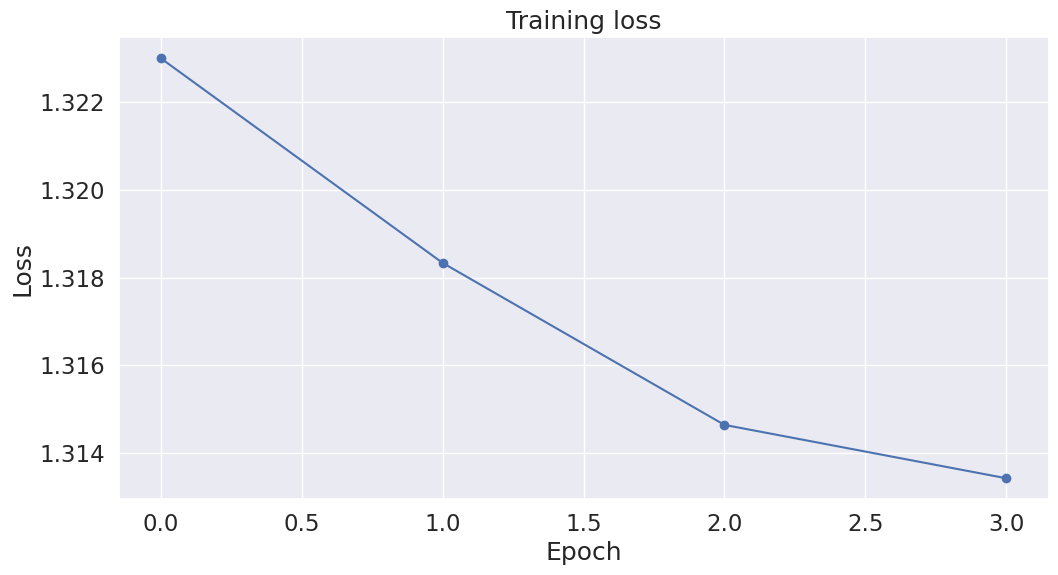

In [ ]:
 import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()